In [232]:
import numpy as np
from scipy.spatial.distance import cdist

def HCA(fitness, change):
    pass

def distances(samples, distance=lambda x,y: np.sum(np.abs(x-y))):
    ret = [0 for i in range(samples.shape[1])]
    for i in range(samples.shape[1]):
        print(i)
        ret[i] = np.array([np.sum(list(map(distance, samples[:,i], samples[:,j]))) for j in range((samples.shape[1]))])
    return np.array(ret)
def local_fitness(order, dists, row, col):
    directions = ((1,1), (1,0), (0,1), (1,-1), (0,-1), (-1,1), (-1,0), (-1,-1))
    ret = 0
    for x0, y0 in directions:
        if    (row + x0 < 0 or row + x0 >= order.shape[0]
            or col + y0 < 0 or col + y0 >= order.shape[1]):
            continue
        ret += dists[order[row + x0, col + y0], order[row, col]]
    return ret
def fitness(order, dists, rows, columns):
    ret = 0
    order = np.array(order).reshape(rows, columns)    
    for i in range(rows):
        for j in range(columns):
            ret += local_fitness(order, dists, i, j)
    return ret,

def generate_samples(n_samples, dimensions, base_params=None, noise_var=1):
    if base_params==None:
        base_params = (dimensions//10 )+ 1
    samples = []
    base_samples = []
    distances = []
    labels = []
    zeros = np.zeros(base_params)
    corrs = np.random.normal(0,1, base_params)
    corrs_with = np.random.randint(0, base_params, size=dimensions)
    for i in range(n_samples):
        sample_base = np.random.normal(0,1, base_params)
        base_samples.append(sample_base)
        sample = np.array([corrs[i]*sample_base[i] for i in corrs_with])
        distances.append(np.sum(np.square(zeros-sample_base)))
        samples.append(sample)
    quater1 = np.quantile(distances,0.25)
    quater3 = np.quantile(distances,0.75)
    for i in range(n_samples):
        labels.append(
                distances[i]+np.random.normal(0, noise_var) > quater1
            and
                distances[i]+np.random.normal(0, noise_var) < quater3)
    return np.array(samples), np.array(labels)
    


In [173]:
fitness(np.arange(0,81), ds, 9,9)

49246.16384573888

In [233]:
SIDE_SIZE = 30
print("Generating...")
samples, labels = generate_samples(1000, SIDE_SIZE**2, noise_var=1)
print("Calculating distances...")
dists =distances(samples)
print("Done")

Generating...
Calculating distances...
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267

In [234]:
np.save("samples.npy", samples)
np.save("labels.npy", labels)
np.save("dists.npy", dists)

In [257]:
import array
import random
import numpy as np
import math

from deap import algorithms
from deap import base
from deap import creator
from deap import tools


IND_SIZE = SIDE_SIZE*SIDE_SIZE
rows=SIDE_SIZE
columns=SIDE_SIZE
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)


toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(IND_SIZE), IND_SIZE)
toolbox.register("individual", tools.initIterate, creator.Individual,
                 toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", lambda x: fitness(x, dists, rows, columns))
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

pop = toolbox.population(n=300)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=4000, 
                               stats=stats, halloffame=hof, verbose=True)

C:\Users\souku\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\souku\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	avg        	std    	min        	max        
0  	300   	6.87908e+06	29886.5	6.78498e+06	6.95241e+06
1  	176   	6.86081e+06	26712.5	6.757e+06  	6.94009e+06
2  	178   	6.85145e+06	28522.7	6.75592e+06	6.94791e+06
3  	185   	6.84733e+06	29697.1	6.757e+06  	6.94503e+06
4  	196   	6.84363e+06	32454.9	6.757e+06  	6.92551e+06
5  	201   	6.83894e+06	35253.5	6.757e+06  	6.95266e+06
6  	185   	6.83119e+06	36168  	6.757e+06  	6.9393e+06 
7  	174   	6.82382e+06	33576.8	6.74805e+06	6.90846e+06
8  	175   	6.82003e+06	33745.4	6.74805e+06	6.9123e+06 
9  	198   	6.82023e+06	37542.7	6.74805e+06	6.92668e+06
10 	188   	6.81818e+06	37926.2	6.74805e+06	6.92216e+06
11 	164   	6.81083e+06	38951.7	6.74805e+06	6.90969e+06
12 	180   	6.8081e+06 	40251.6	6.74805e+06	6.93934e+06
13 	184   	6.80257e+06	38909  	6.74143e+06	6.91589e+06
14 	187   	6.8041e+06 	40579.7	6.71313e+06	6.89588e+06
15 	184   	6.80137e+06	44046.1	6.71313e+06	6.95119e+06
16 	167   	6.7949e+06 	42571  	6.71313e+06	6.90694e+06
17 	177   

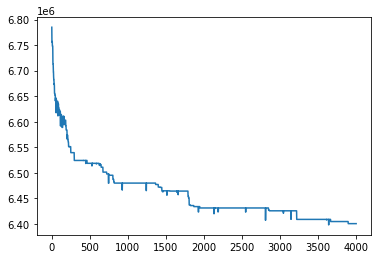

In [260]:
mins = [x["min"] for x in log]
plt.plot(mins)
plt.show()

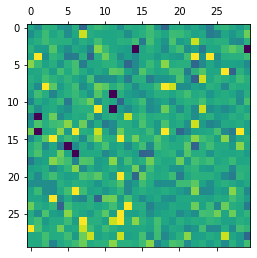

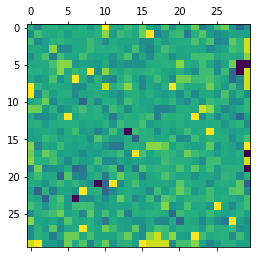

In [274]:
# np.save("result.npy",np.array(hof.items) )
i=2
plt.matshow(samples[i].reshape((SIDE_SIZE,SIDE_SIZE)))
plt.show()
plt.matshow(samples[:,np.array(hof.items).reshape(SIDE_SIZE**2)][i].reshape((SIDE_SIZE,SIDE_SIZE)))
plt.show()

In [271]:
fitness(o, dists, rows, columns)

(6397759.538963347,)

In [270]:
o = np.load("result.npy")
cm = np.corrcoef(samples[:,o].T)
plt.matshow(cm)
plt.show()
cm = np.corrcoef(samples.T)
plt.matshow(cm)
plt.show()


ValueError: m has more than 2 dimensions

In [256]:
o

array([281,  42, 167, 166, 485, 274, 665, 647, 826, 332, 152, 168, 585,
       871, 156, 409, 285, 668, 353, 119, 795, 495,  24, 593, 779, 323,
       272, 670, 117, 244, 426, 886, 839, 118, 813, 787, 573, 780, 213,
       159, 286,  36, 200,  88, 873, 214, 827, 330, 511, 501, 602, 530,
       205, 874, 563, 247, 619, 698, 369, 440, 570,  49, 596, 333, 141,
       789,  20, 356, 185, 866, 890,  64,  12, 894, 299, 812, 457, 849,
       814, 267, 663,   4, 875, 618, 340, 269, 300, 331, 378, 136, 656,
       402,  75, 121,  23, 714, 479, 567, 262, 709, 881, 294,  17, 482,
       774, 545, 187, 468, 694, 566, 796, 887, 201,  48, 742, 376, 251,
       290, 175, 364, 817, 401, 428, 276, 686, 149, 212, 758, 580, 806,
        91, 861, 713, 209, 591,   0, 836,  29,  59, 224,  61,  72, 576,
       465, 547, 298, 504, 352, 162, 610, 680, 484, 455, 229, 383, 494,
       412, 241, 642, 896, 705, 743, 206,  21, 321, 536, 473, 387, 639,
       296,  85, 844, 895, 794, 235, 297, 114, 733, 888, 790, 78

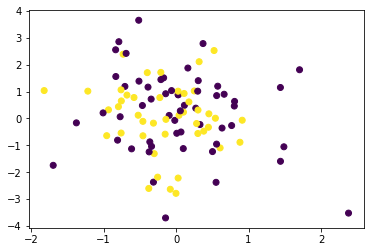

In [152]:
import matplotlib.pyplot as plt
samples, labels = generate_samples(100, 81, noise_var=1)
plt.scatter(samples[:,0], samples[:,1], c=labels)
plt.show()

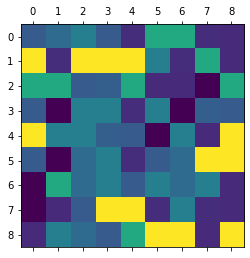

In [160]:
plt.matshow(distances(samples))
plt.show()

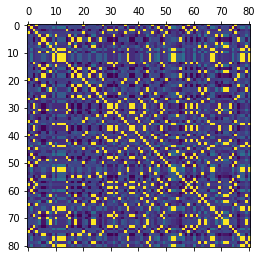

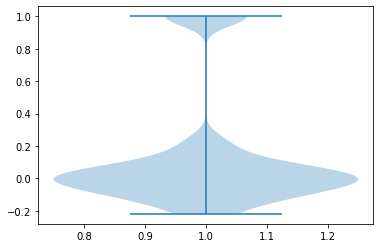

In [158]:
cm = np.corrcoef(samples.T)
plt.matshow(cm)
plt.show()
b = cm.flatten()
plt.violinplot(b)
plt.show()

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8


IndexError: index 9 is out of bounds for axis 1 with size 9

In [302]:
orig_X = np.array([i.reshape(SIDE_SIZE,SIDE_SIZE,1) for i in samples])
X = np.array([i[o].reshape(SIDE_SIZE,SIDE_SIZE,1) for i in samples])
y = labels

In [278]:
import random
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.activations import linear, relu
from tensorflow.nn import softmax


In [303]:
model = tf.keras.models.Sequential([])
model.add(InputLayer(input_shape = (SIDE_SIZE, SIDE_SIZE,1)))
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation=relu))
model.add(MaxPool2D(strides=2, pool_size=(2, 2)))
# model.add(Conv2D(filters=64, kernel_size=5, activation=relu))
# model.add(MaxPool2D(strides=2, pool_size=(2, 2)))
model.add(Flatten(name='Flatten'))
model.add(Dense(units=32, activation=relu))
model.add(Dense(units=1, name='logits', activation="sigmoid"))
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 16)        416       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
Flatten (Flatten)            (None, 2704)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                86560     
_________________________________________________________________
logits (Dense)               (None, 1)                 33        
Total params: 87,009
Trainable params: 87,009
Non-trainable params: 0
_________________________________________________________________


In [304]:
model.fit(X,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 6ms/step - loss: 0.7220 - accuracy: 0.4970
Epoch 2/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6863 - accuracy: 0.5510
Epoch 3/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6797 - accuracy: 0.5720
Epoch 4/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6676 - accuracy: 0.5840
Epoch 5/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6607 - accuracy: 0.6170
Epoch 6/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6488 - accuracy: 0.6320
Epoch 7/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6338 - accuracy: 0.6650
Epoch 8/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6299 - accuracy: 0.6600
Epoch 9/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6164 - accuracy: 0.6450
Epoch 10/100
32/32 [==============================] - 0s 6ms/step - loss: 0.5911 - accuracy: 0.6970
Epoch 11/

KeyboardInterrupt: 